In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import optuna
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest, RandomForestClassifier, RandomForestRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LassoCV, ElasticNetCV, LinearRegression
from sklearn.feature_selection import SelectFromModel
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
import sklearn, pickle

In [2]:
data=pd.read_csv("C:\\Users\\cw\\Downloads\\co2_emissions.csv")
data.head(5)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [3]:
data.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

In [4]:
data.shape

(7385, 12)

In [5]:
data.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

* Categorical:   make, model, vehicle_class, transmission, fuel_type
* Numerical:   engine_size, cylinders, fuel_consumption_city, fuel_consumption_hwy, fuel_consumption_comb(l/100km), fuel_consumption_comb(mpg)
* Target:   co2_emissions

In [8]:
data.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [9]:
data.duplicated().sum()

1112

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.duplicated().sum()

0

In [12]:
#data.drop(columns=['fuel_consumption_comb(mpg)'], inplace=True)

In [13]:
cat_col=['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']
for col in cat_col:
    data[col]=data[col].astype('category')

In [14]:
data['transmission'].unique()

['AS', 'M', 'AV', 'AM', 'A']
Categories (5, object): ['A', 'AM', 'AS', 'AV', 'M']

In [15]:
data['fuel_type'].unique()

['Z', 'D', 'X', 'E', 'N']
Categories (5, object): ['D', 'E', 'N', 'X', 'Z']

In [16]:
data['vehicle_class'].unique()

['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT', ..., 'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE', 'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL']
Length: 16
Categories (16, object): ['COMPACT', 'FULL-SIZE', 'MID-SIZE', 'MINICOMPACT', ..., 'SUV - STANDARD', 'TWO-SEATER', 'VAN - CARGO', 'VAN - PASSENGER']

In [17]:
data['co2_emissions'].skew()

0.5588650833129282

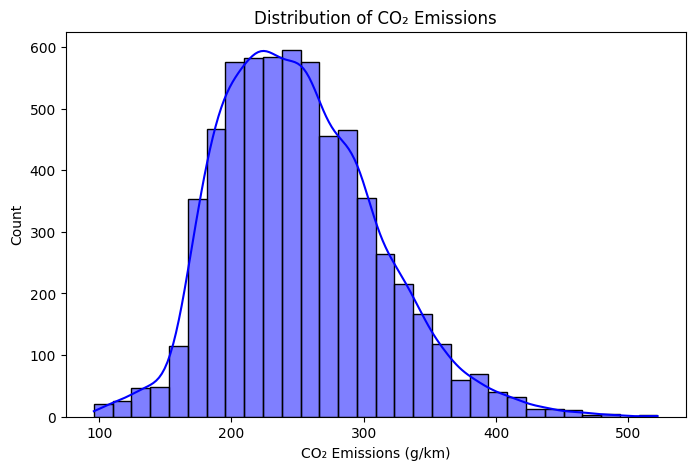

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(data['co2_emissions'], bins=30, kde=True, color="blue")
plt.title("Distribution of CO₂ Emissions")
plt.xlabel("CO₂ Emissions (g/km)")
plt.show()

* The shape is approximately bell-shaped (normal), but with a slight right skew (longer tail towards higher emissions).
* The peak is around 220–260 g/km, where most vehicles lie.

Distribution of engine_size


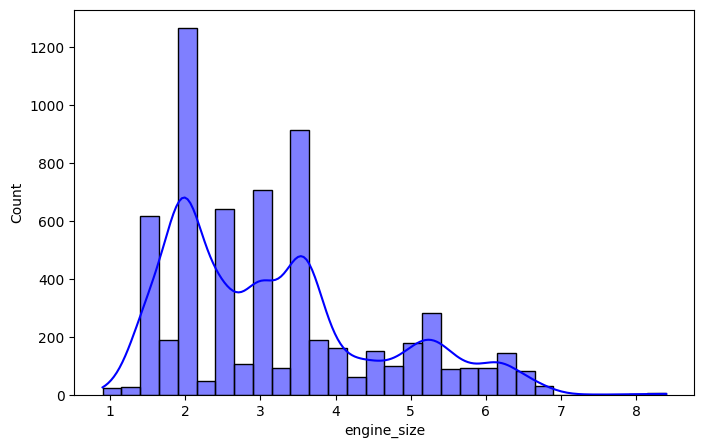

Distribution of cylinders


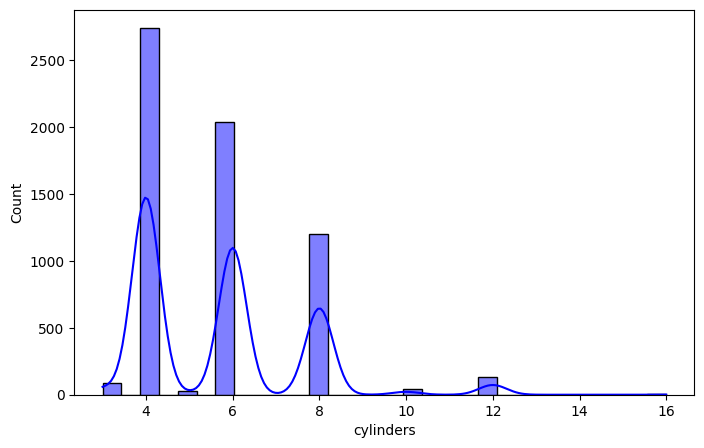

Distribution of fuel_consumption_city


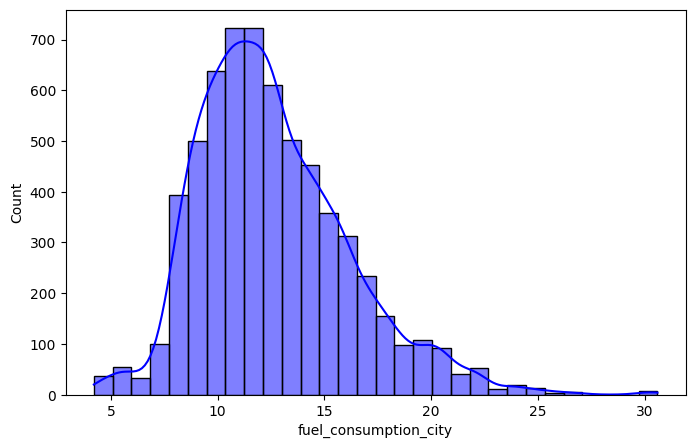

Distribution of fuel_consumption_hwy


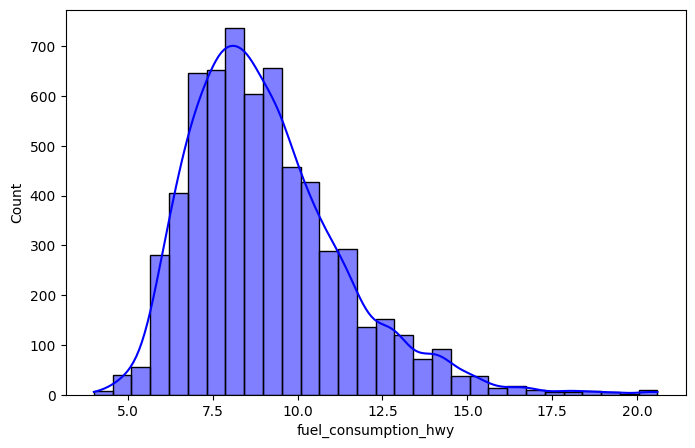

Distribution of fuel_consumption_comb(l/100km)


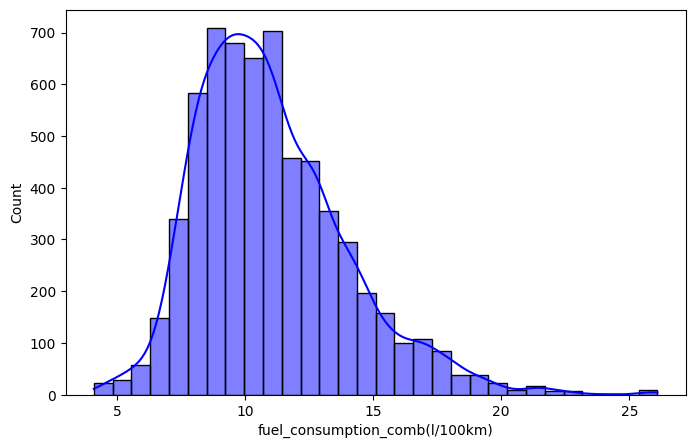

Distribution of fuel_consumption_comb(mpg)


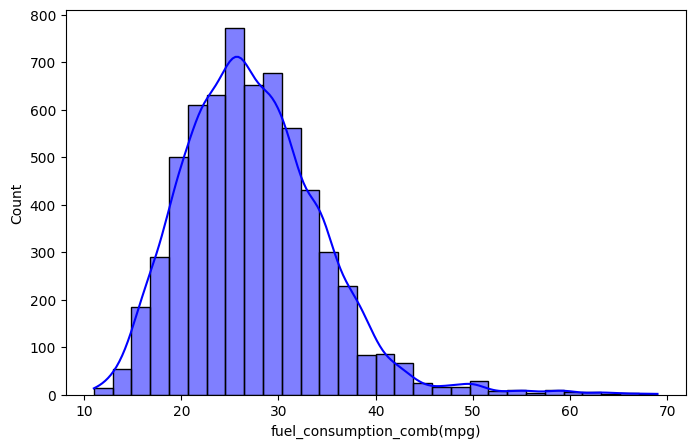

In [20]:
cols=['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)','fuel_consumption_comb(mpg)']
for i in cols:
    plt.figure(figsize=(8,5))
    sns.histplot(data[i], bins=30, kde=True, color="blue")
    plt.title(print('Distribution of',i))
    plt.show()
    

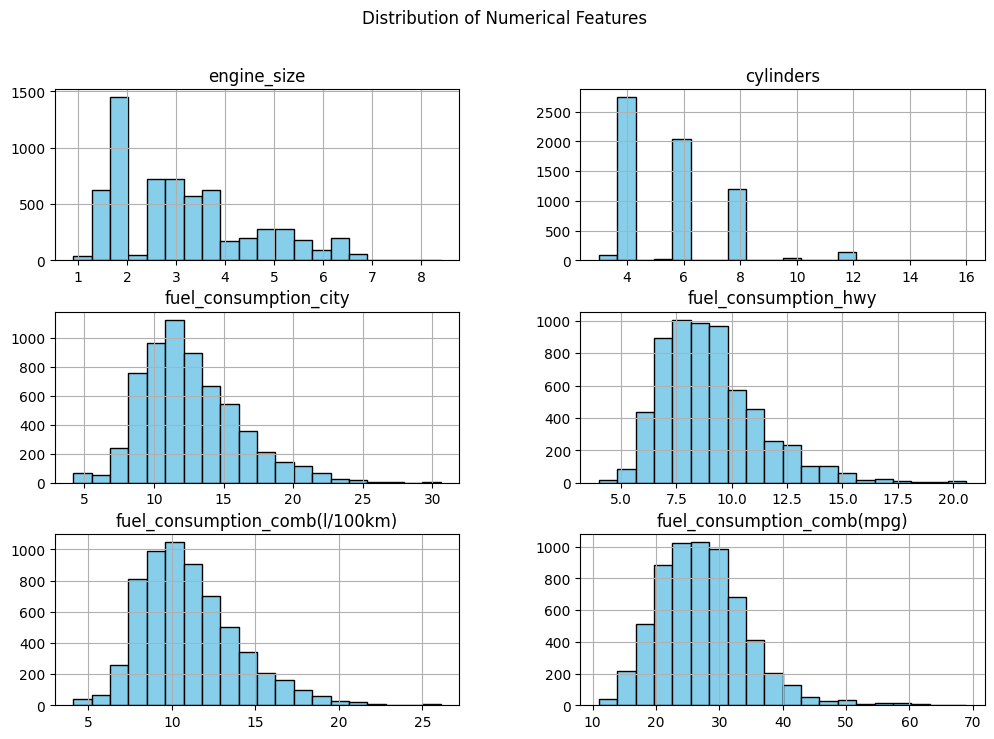

In [21]:
num_cols = ['engine_size','cylinders','fuel_consumption_city',
            'fuel_consumption_hwy','fuel_consumption_comb(l/100km)','fuel_consumption_comb(mpg)']

data[num_cols].hist(bins=20, figsize=(12,8), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Features")
plt.show()

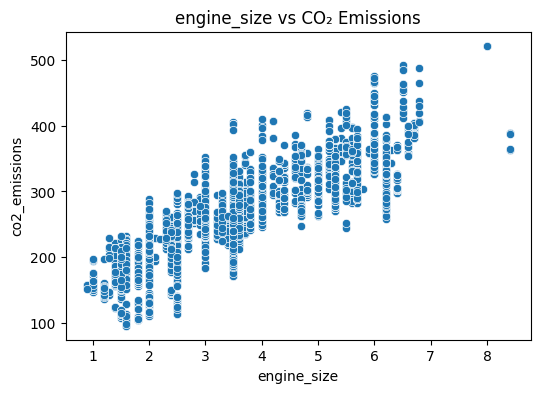

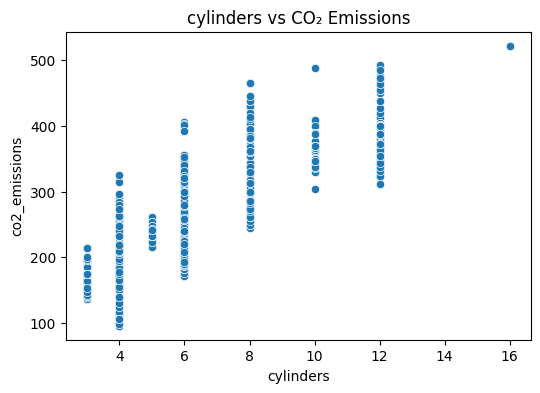

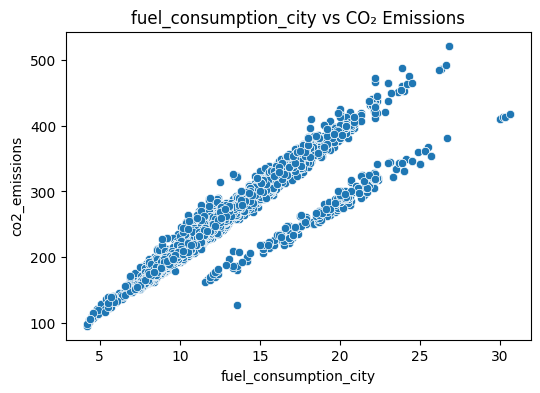

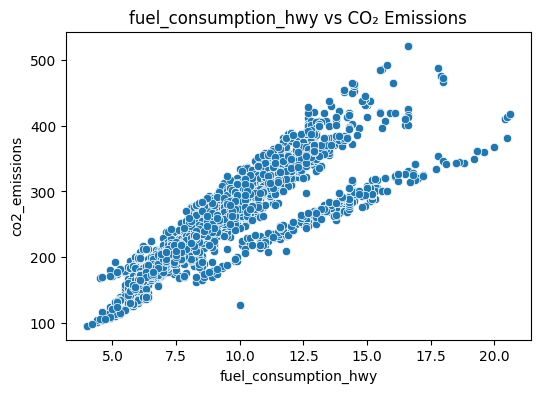

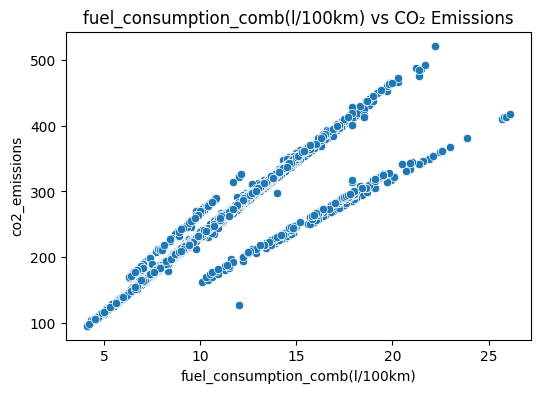

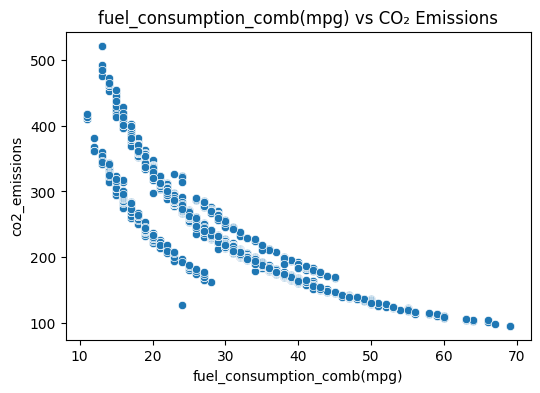

In [22]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=data[col], y=data['co2_emissions'])
    plt.title(f"{col} vs CO₂ Emissions")
    plt.show()

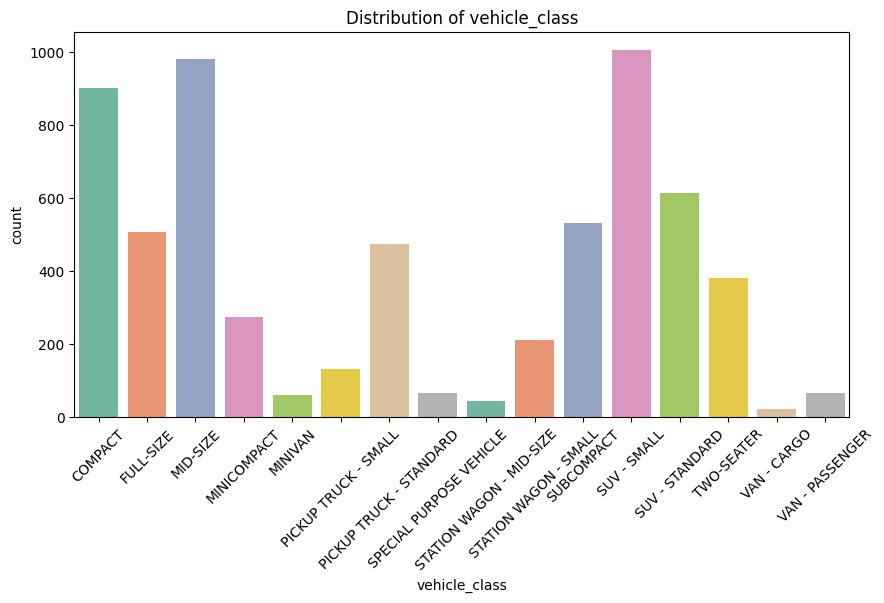

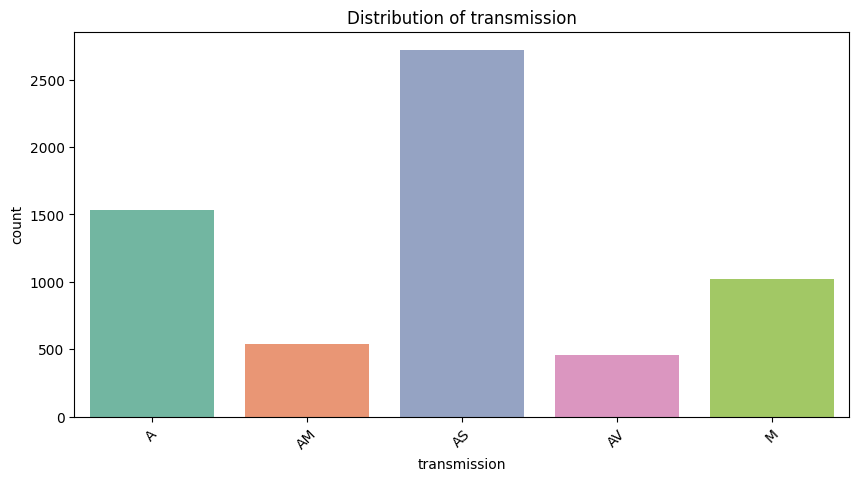

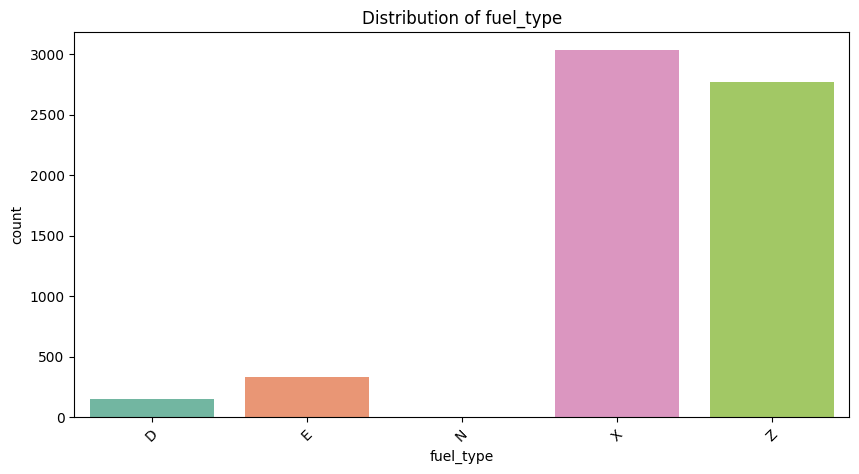

In [23]:
cat_cols=['vehicle_class','transmission','fuel_type']

for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=data, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [24]:
# for col in cat_cols:
#     plt.figure(figsize=(10,5))
#     sns.boxplot(x=col, y='co2_emissions', data=data, palette="Set3")
#     plt.title(f"CO₂ Emissions by {col}")
#     plt.xticks(rotation=45)
#     plt.show()

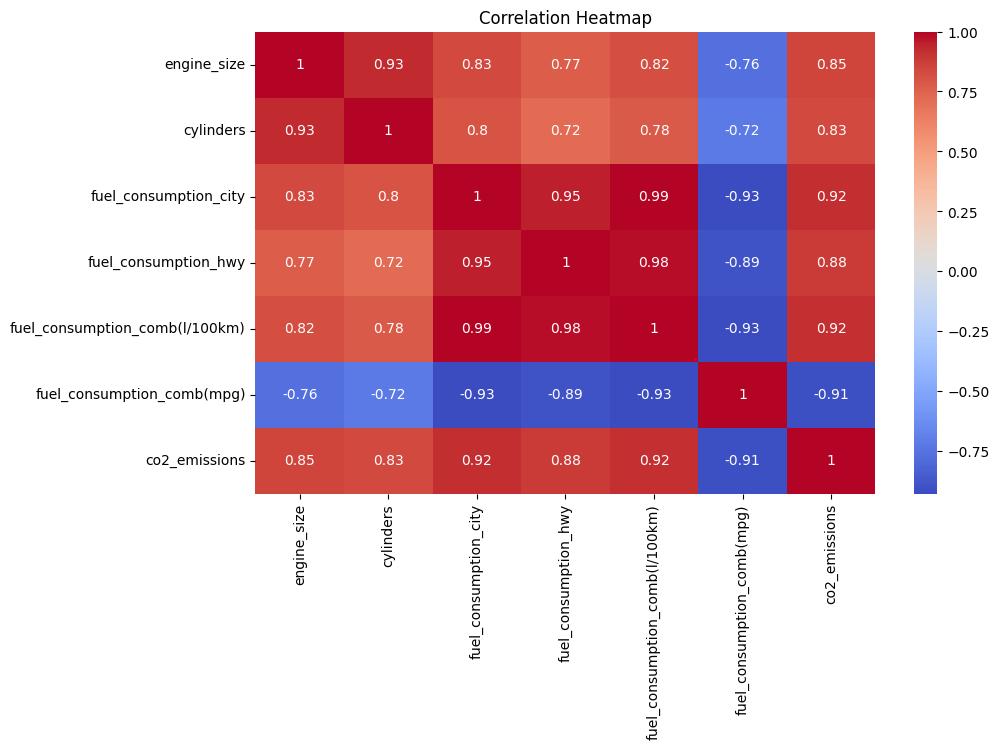

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(data[num_cols + ['co2_emissions']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

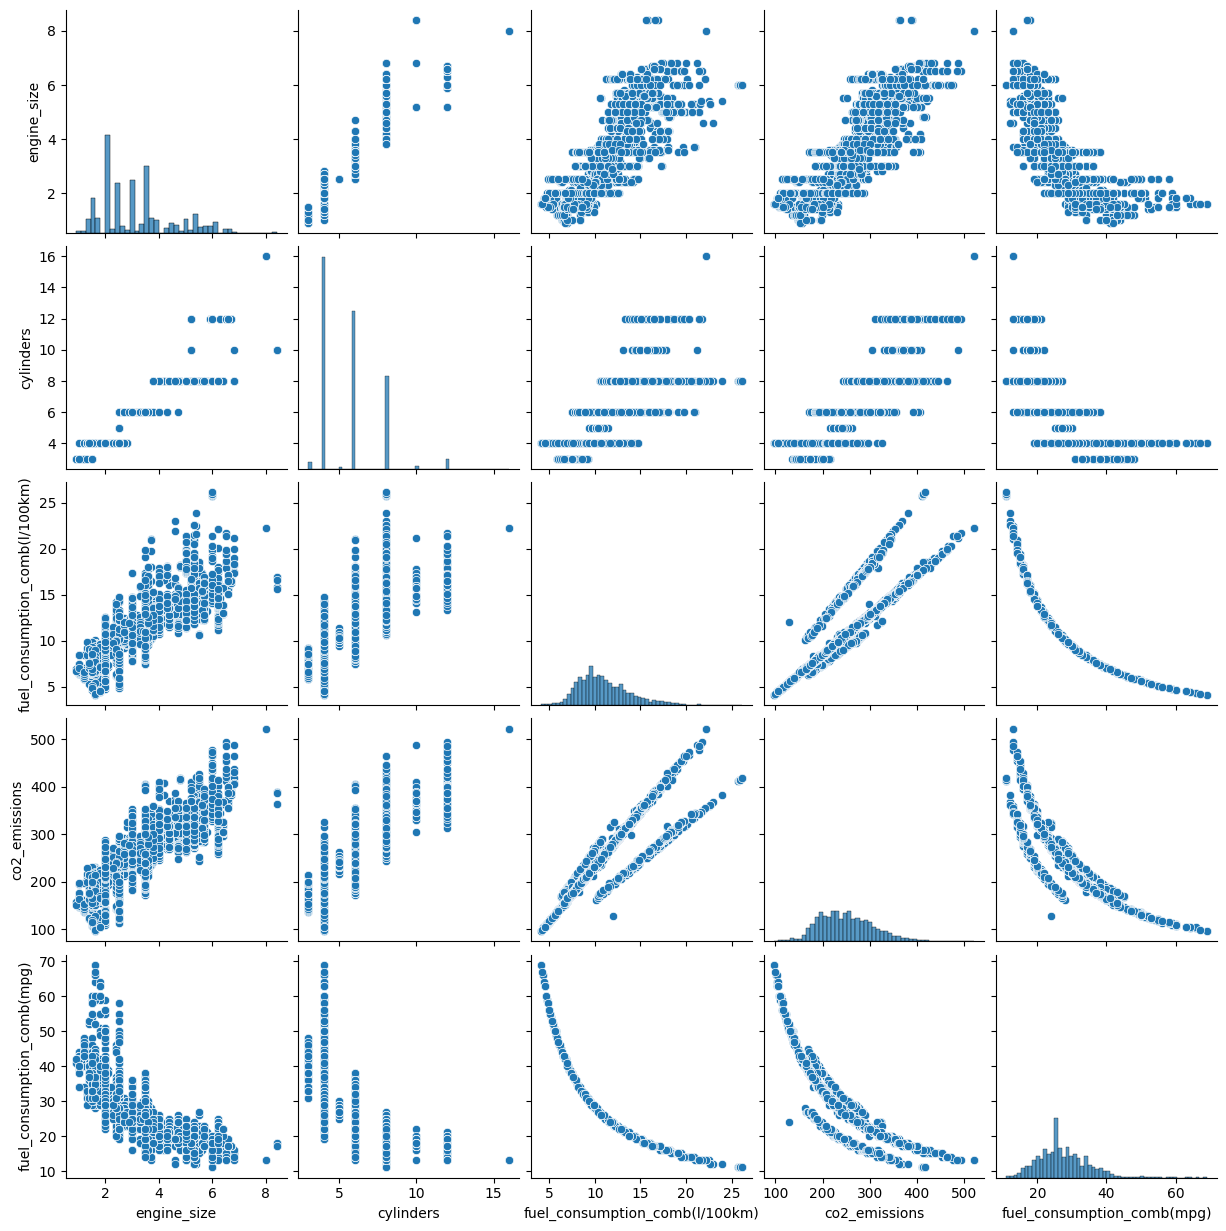

In [26]:
sns.pairplot(data[['engine_size','cylinders','fuel_consumption_comb(l/100km)','co2_emissions','fuel_consumption_comb(mpg)']])
plt.show()

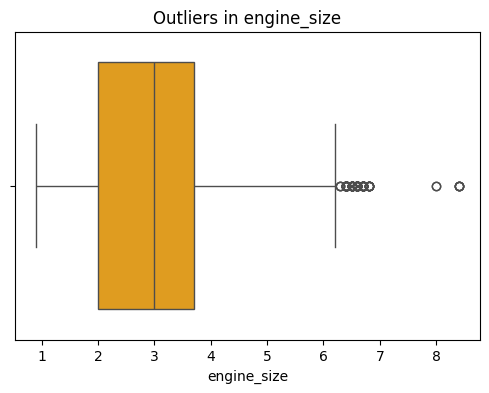

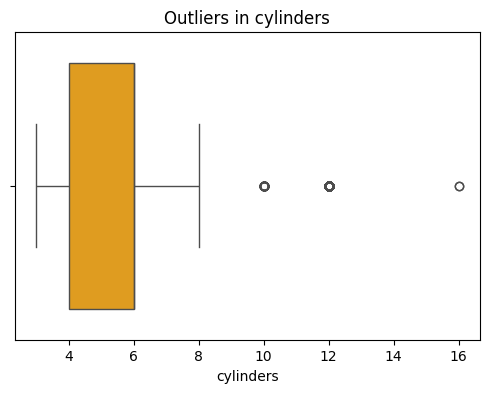

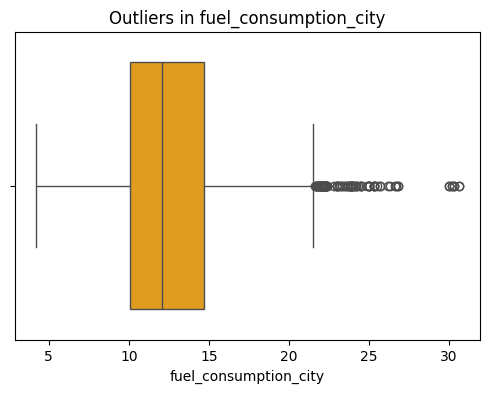

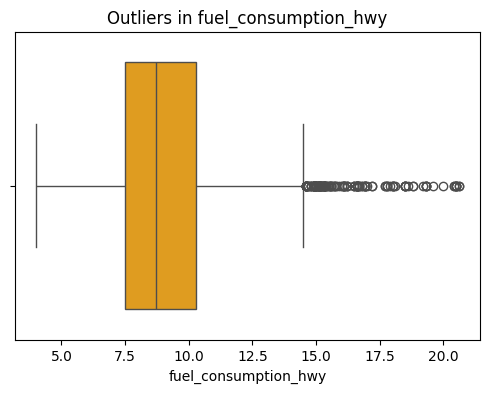

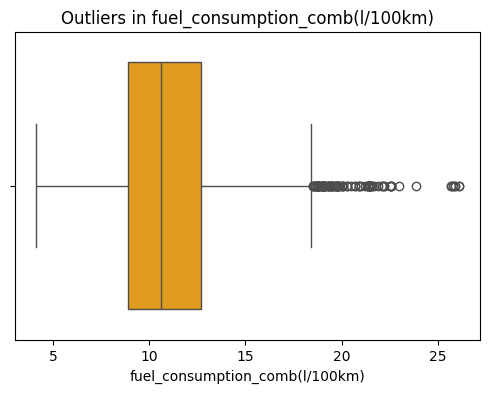

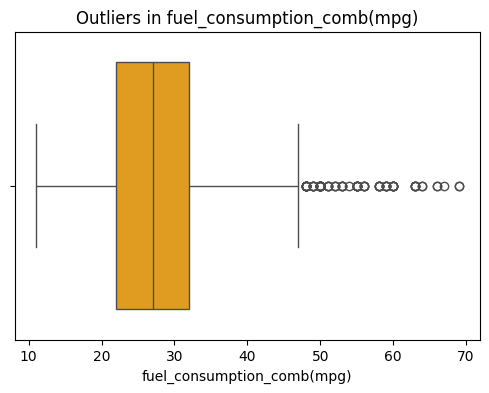

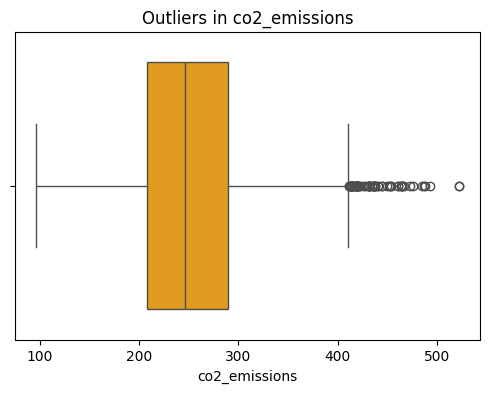

In [27]:
for col in num_cols + ['co2_emissions']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col], color="orange")
    plt.title(f"Outliers in {col}")
    plt.show()

In [28]:
data.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

In [29]:
X= data.drop(columns=['co2_emissions'])
y=data['co2_emissions']
print(X.shape)
print(y.shape)

(6273, 11)
(6273,)


In [30]:
X_train,X_temp,y_train,y_temp= train_test_split(X,y, test_size=0.3,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)
print(f"Train:{len(X_train)} | Validation:{len(X_val)} |  Test:{len(X_test)}")

Train:4391 | Validation:941 |  Test:941


In [31]:
numeric_features=data.select_dtypes(include=['number'])
numeric_features=numeric_features.drop(columns=['co2_emissions'])

In [32]:
skewness=numeric_features.skew()

right_skewed= skewness[skewness > 0.5].index.tolist()
left_skewed= skewness[skewness < -0.5].index.tolist() 
normal_features =[col for col in numeric_features if col not in right_skewed+left_skewed]
print("Right-skewed features:", right_skewed)
print("Left-skewed features:", left_skewed)
print("Normal features:", normal_features)

Right-skewed features: ['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)']
Left-skewed features: []
Normal features: []


In [33]:
"""
1- Preprocessing: A preprocessing pipeline was built to handle scaling, encoding, and power transformation. Numerical features were standardized,
categorical features were encoded, and transformations were applied to reduce skewness. 

2- Variance Inflation Factor (VIF): VIF was used to detect multicollinearity among numerical features. Features with high VIF values were then 
removed tousing feature selection techniques(LassoCV) to  reduce redundancy, improving model stability and interpretability.

Feature Selection: LassoCV was applied as a regularization-based feature selection method. By shrinking less important coefficients to zero,
it helped retain only the most significant predictors, reducing overfitting and enhancing generalization.
"""

'\n1- Preprocessing: A preprocessing pipeline was built to handle scaling, encoding, and power transformation. Numerical features were standardized,\ncategorical features were encoded, and transformations were applied to reduce skewness. \n\n2- Variance Inflation Factor (VIF): VIF was used to detect multicollinearity among numerical features. Features with high VIF values were then \nremoved tousing feature selection techniques(LassoCV) to  reduce redundancy, improving model stability and interpretability.\n\nFeature Selection: LassoCV was applied as a regularization-based feature selection method. By shrinking less important coefficients to zero,\nit helped retain only the most significant predictors, reducing overfitting and enhancing generalization.\n'

In [34]:
numeric_features=['engine_size', 'cylinders',
       'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)']

categorical_features=['make','model','vehicle_class','transmission', 'fuel_type', ]

numeric_transformer=Pipeline(steps=[
    ('power',PowerTransformer(method="yeo-johnson")),
    ('scaler',StandardScaler())
])

categorical_transformer=Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

preprocessor=ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features),
        ('cat',categorical_transformer,categorical_features)
    ]
)

                          Feature          VIF
0                     engine_size     9.131249
1                       cylinders     7.961396
2           fuel_consumption_city  1351.020869
3            fuel_consumption_hwy   347.518414
4  fuel_consumption_comb(l/100km)  3459.684500
5      fuel_consumption_comb(mpg)   519.832533


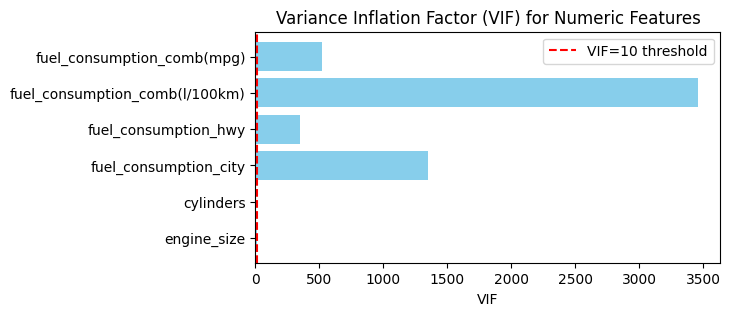

In [35]:
X_train_num=X_train.select_dtypes(include=['int64','float64'])

X_train_num_transformed=numeric_transformer.fit_transform(X_train_num)

new_cols=list(X_train_num.columns)

X_train_num_transformed= pd.DataFrame(
    X_train_num_transformed,
    columns=new_cols,
    index=X_train.index
)

vif_data=pd.DataFrame()
vif_data['Feature']=X_train_num_transformed.columns
vif_data['VIF']=[
    variance_inflation_factor(X_train_num_transformed.values,i)
                             for i in range(X_train_num_transformed.shape[1])
]

print(vif_data)

plt.figure(figsize=(6,3))
plt.barh(vif_data["Feature"], vif_data["VIF"], color="skyblue")
plt.axvline(x=10, color="red", linestyle="--", label="VIF=10 threshold")
plt.xlabel("VIF")
plt.title("Variance Inflation Factor (VIF) for Numeric Features")
plt.legend()
plt.show()

In [36]:
'''
Variance Inflation Factor (VIF) tells how much a feature is inflated due to multicollinearity with all the other predictors together.
fuel_consumption_city, fuel_consumption_hwy, and fuel_consumption_comb(l/100km) all have huge VIF values → they are heavily collinear with each other.
Interpretation:
---------------
VIF = 1 → no correlation.
VIF between 1–5 → moderate correlation (usually fine).
VIF > 10 → high multicollinearity → consider removing/dropping one of those features.
'''

'\nVariance Inflation Factor (VIF) tells how much a feature is inflated due to multicollinearity with all the other predictors together.\nfuel_consumption_city, fuel_consumption_hwy, and fuel_consumption_comb(l/100km) all have huge VIF values → they are heavily collinear with each other.\nInterpretation:\n---------------\nVIF = 1 → no correlation.\nVIF between 1–5 → moderate correlation (usually fine).\nVIF > 10 → high multicollinearity → consider removing/dropping one of those features.\n'

In [37]:
X_train_transformed= preprocessor.fit_transform(X_train)
X_val_transformed=preprocessor.transform(X_val)
X_test_transformed=preprocessor.transform(X_test)

lasso_selector = SelectFromModel(
    LassoCV(cv=5,random_state=42,n_jobs=-1),
    threshold=None
)
lasso_selector.fit(X_train_transformed,y_train)

X_train_selected=lasso_selector.transform(X_train_transformed)
X_val_selected=lasso_selector.transform(X_val_transformed)
X_test_selected=lasso_selector.transform(X_test_transformed)

selected_mask=lasso_selector.get_support()

ohe_cols=preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_features=numeric_features + list(ohe_cols)

selected_features=[f for f, keep in zip(all_features,selected_mask) if keep]
removed_features=[f for f, keep in zip(all_features,selected_mask) if not keep]

print("Selected features:", selected_features)

Selected features: ['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'make_AUDI', 'make_BENTLEY', 'make_BMW', 'make_CHEVROLET', 'make_CHRYSLER', 'make_HONDA', 'make_HYUNDAI', 'make_INFINITI', 'make_KIA', 'make_LAMBORGHINI', 'make_LEXUS', 'make_MASERATI', 'make_NISSAN', 'make_PORSCHE', 'make_ROLLS-ROYCE', 'make_SUBARU', 'make_TOYOTA', 'make_VOLVO', 'vehicle_class_MINIVAN', 'vehicle_class_PICKUP TRUCK - STANDARD', 'vehicle_class_SUBCOMPACT', 'vehicle_class_SUV - SMALL', 'vehicle_class_SUV - STANDARD', 'vehicle_class_TWO-SEATER', 'vehicle_class_VAN - CARGO', 'vehicle_class_VAN - PASSENGER', 'transmission_A', 'transmission_AM', 'transmission_AS', 'transmission_AV', 'fuel_type_D', 'fuel_type_E']


In [38]:
X_train_transformed=preprocessor.fit_transform(X_train)
X_val_transformed=preprocessor.transform(X_val)

X_train_selected=lasso_selector.transform(X_train_transformed)
X_val_selected=lasso_selector.transform(X_val_transformed)

svr_pipeline=Pipeline([
    ("to_dense", FunctionTransformer(lambda x: np.asarray(x.todense()) if hasattr(x, "todense") else np.asarray(x), accept_sparse=True)),
    ('scaler',StandardScaler()),
    ('svr',SVR())
])

knn_pipeline=Pipeline([
    ("to_dense", FunctionTransformer(lambda x: np.asarray(x.todense()) if hasattr(x, "todense") else np.asarray(x), accept_sparse=True)),
    ('scaler',StandardScaler()),
    ('knn',KNeighborsRegressor())
])

models={
    'LinearRegression':LinearRegression(),
    'ElasticNetCV':ElasticNetCV(cv=5,random_state=42),
    'RandomForest':RandomForestRegressor(random_state=42),
    'XGBRegressor':XGBRegressor(random_state=42),
    'SVR':svr_pipeline,
    'KNNRegressor':knn_pipeline
}

results={}

for name, model in models.items():
    model.fit(X_train_selected,y_train)
    y_pred= model.predict(X_val_selected)

    rmse=np.sqrt(mean_squared_error(y_val,y_pred))
    r2=r2_score(y_val,y_pred)*100

    results[name]={'RMSE': rmse, 'R2':r2}

for model_name, metrics in results.items():
    print(f"{model_name} -> RMSE: {metrics['RMSE']:.4f}, R2: {metrics['R2']:.4f}%")

LinearRegression -> RMSE: 8.5542, R2: 97.9171%
ElasticNetCV -> RMSE: 15.4277, R2: 93.2251%
RandomForest -> RMSE: 4.0798, R2: 99.5262%
XGBRegressor -> RMSE: 3.9341, R2: 99.5595%
SVR -> RMSE: 29.5401, R2: 75.1616%
KNNRegressor -> RMSE: 11.2890, R2: 96.3725%


In [39]:
cv=KFold(n_splits=5,shuffle=True,random_state=42)

rmse_scorer=make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true,y_pred)))
r2_scorer=make_scorer(r2_score)

results={}

for name, model in models.items():
    rmse_scores=cross_val_score(model,X_train_selected,y_train,scoring=rmse_scorer,cv=cv)
    r2_scores=cross_val_score(model,X_train_selected,y_train,scoring=rmse_scorer,cv=cv)

    results[name]={
        'RMSE Mean':rmse_scores.mean(),
        'RMSE STD':rmse_scores.std(),
        'R2 Mean':r2_scores.mean(),
        'R2 STD':r2_scores.std(),
    }

for model_name,metrics in results.items():
    print(f"{model_name}-> RMSE:{metrics['RMSE Mean']:.4f}(+/-{metrics['RMSE STD']:.4f})," 
          f"R2:{metrics['R2 Mean']:.2f}%(+/- {metrics['R2 STD']:.2f}%)")

LinearRegression-> RMSE:8.3264(+/-0.3046),R2:8.33%(+/- 0.30%)
ElasticNetCV-> RMSE:14.5902(+/-0.4364),R2:14.59%(+/- 0.44%)
RandomForest-> RMSE:3.7247(+/-0.3705),R2:3.72%(+/- 0.37%)
XGBRegressor-> RMSE:3.5857(+/-0.3516),R2:3.59%(+/- 0.35%)
SVR-> RMSE:30.7841(+/-1.5841),R2:30.78%(+/- 1.58%)
KNNRegressor-> RMSE:12.8854(+/-0.7365),R2:12.89%(+/- 0.74%)


In [40]:
'''
- XGBRegressor has the lowest mean RMSE  and a relatively small standard deviation , making it the most accurate 
  and consistent model across folds.
- RandomForest also performs strongly with a mean RMSE, though it’s slightly less accurate and less stable than XGB.
- ElasticNetCV and LinearRegression show moderate performance, with higher errors compared to ensemble methods.
- SVR has the highest RMSE and is clearly underfitting the dataset.

Based on cross-validation, XGBRegressor is the best choice for this problem.
'''

'\n- XGBRegressor has the lowest mean RMSE  and a relatively small standard deviation , making it the most accurate \n  and consistent model across folds.\n- RandomForest also performs strongly with a mean RMSE, though it’s slightly less accurate and less stable than XGB.\n- ElasticNetCV and LinearRegression show moderate performance, with higher errors compared to ensemble methods.\n- SVR has the highest RMSE and is clearly underfitting the dataset.\n\nBased on cross-validation, XGBRegressor is the best choice for this problem.\n'

In [41]:
#pip install optuna

In [42]:
cv=KFold(n_splits=5,shuffle=True,random_state=42)

X_input=np.asarray(X_train_selected.todense()) if hasattr(X_train_selected,'todense') else X_train_selected

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 1.0, log=True),  # L1 regularization
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 1.0, log=True) # L2 regularization
    }
    model=XGBRegressor(
    random_state=42,
    n_jobs=-1,
    **params
    )

    rmse= -cross_val_score(
        model,X_input,y_train,
        scoring="neg_root_mean_squared_error",
        cv=cv
    ).mean()

    return rmse

study = optuna.create_study(direction="minimize")  # minimize RMSE
study.optimize(objective, n_trials=50)

print("Best Parameters:", study.best_trial.params)
print("Best RMSE:", study.best_value)

[I 2025-09-27 14:47:36,315] A new study created in memory with name: no-name-d24d9099-404e-4d05-a1eb-1dc4ac8c1cda
[I 2025-09-27 14:47:37,422] Trial 0 finished with value: 3.3847346782684324 and parameters: {'n_estimators': 391, 'max_depth': 5, 'learning_rate': 0.017905141643329105, 'subsample': 0.7827776902348975, 'colsample_bytree': 0.9585771456688754, 'reg_alpha': 2.6366279496265565e-08, 'reg_lambda': 0.011542317492173711}. Best is trial 0 with value: 3.3847346782684324.
[I 2025-09-27 14:47:42,146] Trial 1 finished with value: 4.3503162384033205 and parameters: {'n_estimators': 490, 'max_depth': 11, 'learning_rate': 0.11706484216846026, 'subsample': 0.838712526008562, 'colsample_bytree': 0.6292067489496775, 'reg_alpha': 2.3672355498027927e-05, 'reg_lambda': 6.996683702403483e-06}. Best is trial 0 with value: 3.3847346782684324.
[I 2025-09-27 14:47:42,649] Trial 2 finished with value: 6.156579303741455 and parameters: {'n_estimators': 295, 'max_depth': 3, 'learning_rate': 0.0131318657

Best Parameters: {'n_estimators': 466, 'max_depth': 3, 'learning_rate': 0.2097756900544539, 'subsample': 0.7992877575616084, 'colsample_bytree': 0.6678667711538251, 'reg_alpha': 1.7006979038990994e-05, 'reg_lambda': 0.0015836439902430052}
Best RMSE: 3.1982884883880613


In [43]:
"""
After selecting the best hyperparameters, we refit the XGBoost model on the entire training dataset (train + validation) to leverage all available
labeled data and improve the model’s learning. The final evaluation is performed on the test set, which is completely unseen by the model, to provide 
an unbiased estimate of its performance and to assess whether the model is well-fitted, overfitting, or underfitting.
"""

'\nAfter selecting the best hyperparameters, we refit the XGBoost model on the entire training dataset (train + validation) to leverage all available\nlabeled data and improve the model’s learning. The final evaluation is performed on the test set, which is completely unseen by the model, to provide \nan unbiased estimate of its performance and to assess whether the model is well-fitted, overfitting, or underfitting.\n'

In [44]:
def to_dense(X):
    return np.asarray(X.todense()) if hasattr(X, 'todense') else X

X_full_train= np.vstack([to_dense(X_train_selected), to_dense(X_val_selected)])
y_full_train=np.concatenate([y_train,y_val])

X_test_input=to_dense(X_test_selected)

best_params= study.best_params

xgb_best=XGBRegressor(**best_params)
xgb_best.fit(X_full_train,y_full_train)

y_full_train_pred=xgb_best.predict(X_full_train)

y_test_pred=xgb_best.predict(X_test_input)

rmse_train=np.sqrt(np.sqrt(mean_squared_error(y_full_train,y_full_train_pred)))
mae_train=mean_absolute_error(y_full_train,y_full_train_pred)
r2_train=r2_score(y_full_train,y_full_train_pred)

rmse_test=np.sqrt(np.sqrt(mean_squared_error(y_test,y_test_pred)))
mae_test=mean_absolute_error(y_test,y_test_pred)
r2_test=r2_score(y_test,y_test_pred)

print("Performance Comparison:")
print(f"Train+Val -> RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R2: {(r2_train*100):.2f}%")
print(f"Test      -> RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}, R2: {(r2_test*100):.2f}%")

Performance Comparison:
Train+Val -> RMSE: 1.5594, MAE: 1.7670, R2: 99.83%
Test      -> RMSE: 1.7450, MAE: 2.1796, R2: 99.74%


In [45]:
'''
XGBRegressor which is the best selected model is doing an excellent job.
Train+Val R2 accuracy score shows very strong generalization, no big gap (no overfitting).
RMSE and MAE are low compared to the scale of CO₂ emissions → model predictions are highly accurate.
'''

'\nXGBRegressor which is the best selected model is doing an excellent job.\nTrain+Val R2 accuracy score shows very strong generalization, no big gap (no overfitting).\nRMSE and MAE are low compared to the scale of CO₂ emissions → model predictions are highly accurate.\n'

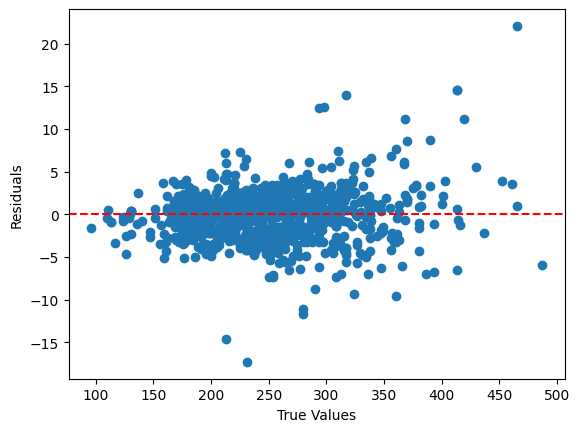

In [46]:
plt.scatter(y_test, y_test - y_test_pred)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.show()

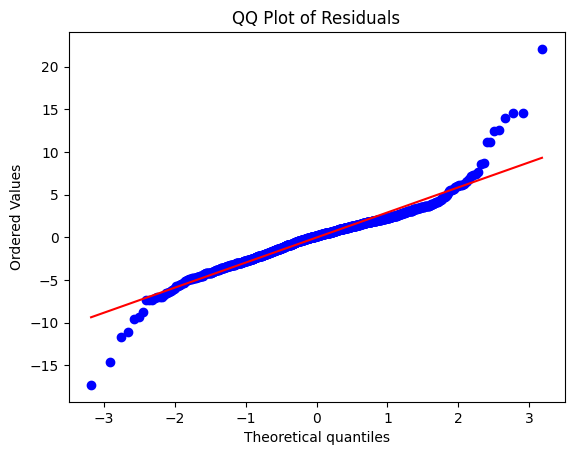

In [47]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Residuals
residuals = y_test - y_test_pred

# QQ plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

In [48]:
# Residuals & QQ plot
'''
(1) Linearity: Residuals are mostly centered around 0 → good sign. The fit is generally linear, though extremes may not be perfectly captured.
(2) Homoscedasticity: Slightly more spread at higher emission values → indicates possible mild heteroscedasticity.
(3) Normality: QQ plot shows that the middle fits well, but tails deviate → residuals have slight skew due to outliers. Since IsolationForest 
    only flagged but didn’t remove them, extreme cars (very low/high emission) make the model less perfect.
'''

'\n(1) Linearity: Residuals are mostly centered around 0 → good sign. The fit is generally linear, though extremes may not be perfectly captured.\n(2) Homoscedasticity: Slightly more spread at higher emission values → indicates possible mild heteroscedasticity.\n(3) Normality: QQ plot shows that the middle fits well, but tails deviate → residuals have slight skew due to outliers. Since IsolationForest \n    only flagged but didn’t remove them, extreme cars (very low/high emission) make the model less perfect.\n'

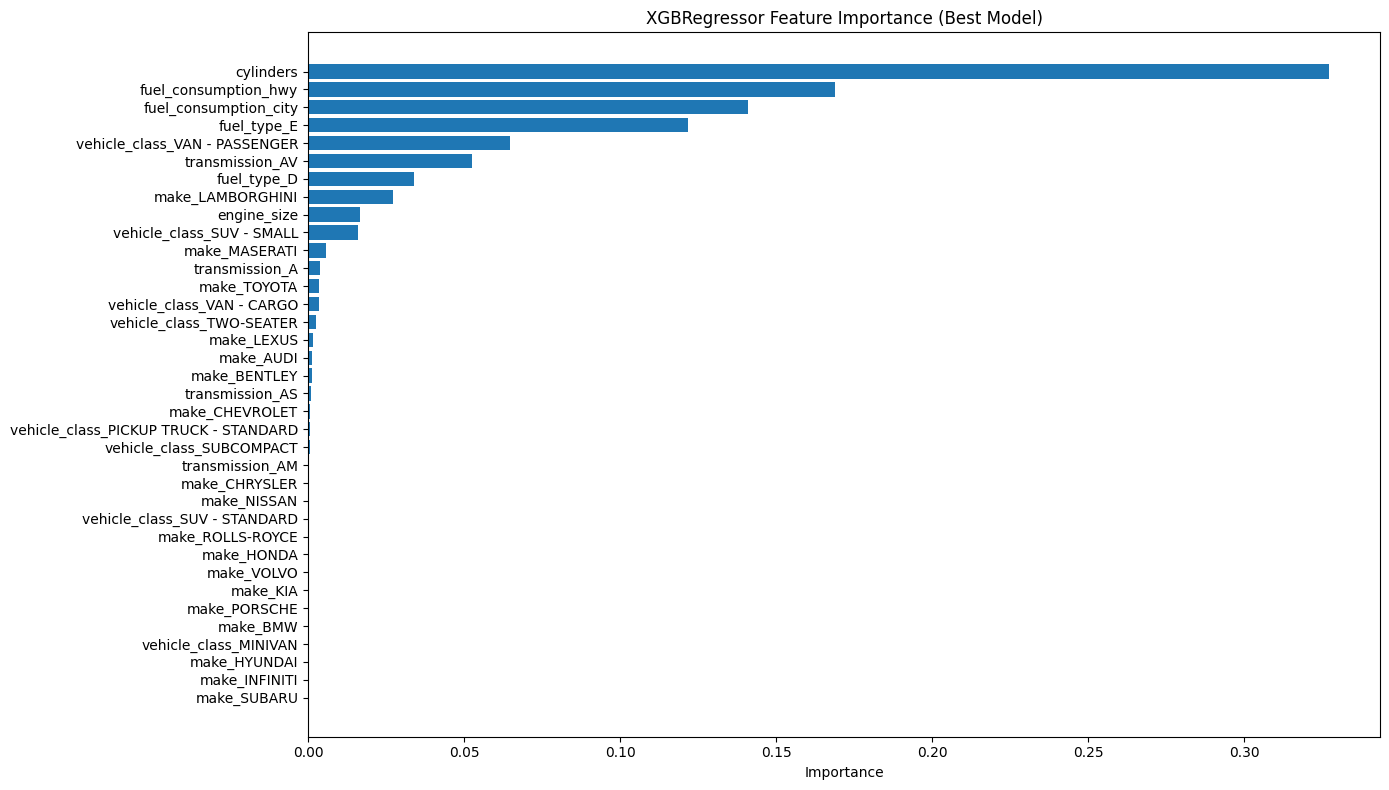

In [49]:
# Get feature importance from the best tuned model
importances = xgb_best.feature_importances_

feat_imp = sorted(zip(selected_features, importances), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(14, 8))
plt.barh([f[0] for f in feat_imp], [f[1] for f in feat_imp])
plt.xlabel("Importance")
plt.title("XGBRegressor Feature Importance (Best Model)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [50]:
'''
1) Top 2 dominant features: fuel_consumption_city (by far the strongest predictor) and fuel_type_E.
   These two dominate the model, meaning predictions are heavily influenced by city fuel consumption and whether the fuel type is E.

2) Secondary contributors: fuel_consumption_hwy, cylinders, fuel_type_Z/X/D, engine_size.
   These also matter but much less compared to the top features.

3) Many categorical features (vehicle class, make, transmission) have tiny importance.

Key Insights:
-------------
- XGBRegressor’s performance is largely driven by fuel consumption and fuel type. Model is mainly learning from numerical efficiency-related
  features (fuel consumption, engine size, cylinders), which makes sense.
- Other features (like vehicle class, make, transmission) have minor impact, but still provide small improvements.
'''

'\n1) Top 2 dominant features: fuel_consumption_city (by far the strongest predictor) and fuel_type_E.\n   These two dominate the model, meaning predictions are heavily influenced by city fuel consumption and whether the fuel type is E.\n\n2) Secondary contributors: fuel_consumption_hwy, cylinders, fuel_type_Z/X/D, engine_size.\n   These also matter but much less compared to the top features.\n\n3) Many categorical features (vehicle class, make, transmission) have tiny importance.\n\nKey Insights:\n-------------\n- XGBRegressor’s performance is largely driven by fuel consumption and fuel type. Model is mainly learning from numerical efficiency-related\n  features (fuel consumption, engine size, cylinders), which makes sense.\n- Other features (like vehicle class, make, transmission) have minor impact, but still provide small improvements.\n'

In [51]:
### Pipeline Creation and Pickle Export for Car Emissions Model

In [52]:
X_full_train_raw=pd.concat([X_train, X_val])
y_full_train_raw=pd.concat([y_train, y_val])

final_pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ('feature_selector',lasso_selector),
    ('model',xgb_best)
])

final_pipeline.fit(X_full_train_raw,y_full_train)

#with open('car_emissions_model.pkl', 'wb') as f:
    #pickle.dump(final_pipeline, f)
import cloudpickle

with open("car_emissions_model.pkl", "wb") as f:
    cloudpickle.dump(model, f)

print("Pickle file created successfully!")

Pickle file created successfully!
